In [36]:
import numpy as np
import matplotlib.pyplot as plt

### Define a non-uniform grid


In [37]:
Nx, Ny = 20, 20
x = np.linspace(-2, 2, Nx)**2  # Quadratic spacing in x
y = np.logspace(-1, 1, Ny) - 1  # Logarithmic spacing in y
X, Y = np.meshgrid(x, y)

# Compute grid non-uniform spacing
dx = np.diff(x)
dy = np.diff(y)

### Define velocity components


In [38]:
U = Y  # u(x, y) = y
V = X**2  # v(x, y) = x^2

### Compute derivatives using finite difference method


In [39]:
du_dx = np.zeros((Ny, Nx))
dv_dy = np.zeros((Ny, Nx))

for i in range(Nx - 1):
    du_dx[:, i] = (U[:, i + 1] - U[:, i]) / dx[i]
du_dx[:, -1] = du_dx[:, -2]  # Boundary handling

for j in range(Ny - 1):
    dv_dy[j, :] = (V[j + 1, :] - V[j, :]) / dy[j]
dv_dy[-1, :] = dv_dy[-2, :]  # Boundary handling

# Compute divergence
div_v = du_dx + dv_dy

### Plot the divergence on the non-uniform grid


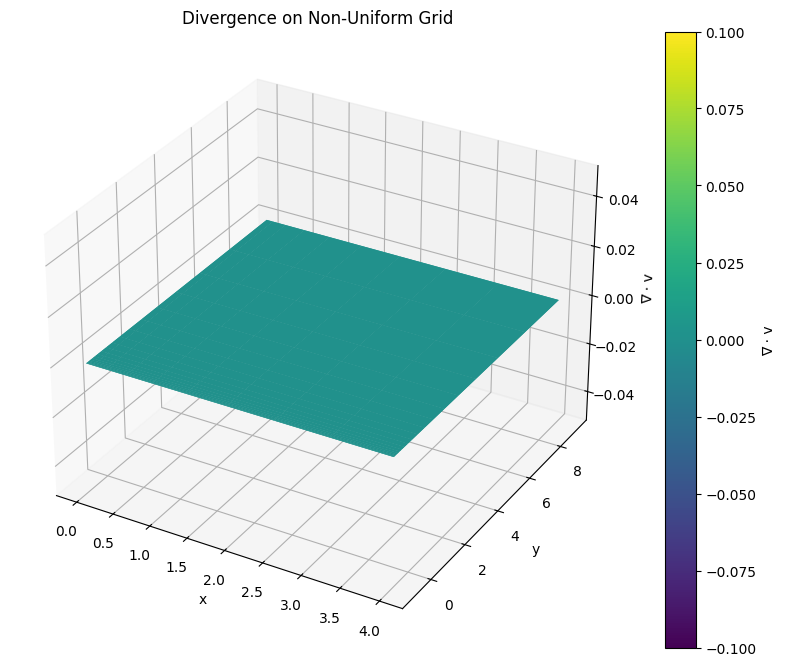

In [41]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, div_v, cmap='viridis', edgecolor='none')
fig.colorbar(surf, ax=ax, label='∇ · v')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('∇ · v')
ax.set_title('Divergence on Non-Uniform Grid')
plt.show()